In [1]:
import math
import pickle
import copy
import gzip
import pandas as pd
import numpy as np
from pymatgen.util import coord
from pymatgen.io.ase import AseAtomsAdaptor
from ase.visualize.plot import plot_atoms
from matplotlib import pyplot as plt
from pymatgen.core.structure import Structure
from pymatgen.core.periodic_table import Element
from pymatgen.core.sites import Site

In [2]:
with gzip.open('data.pickle.gz', 'rb') as fh:
    data = pickle.load(fh, )

In [60]:
# data.shape

In [61]:
# data["defect_representation"]

In [123]:
# data1 = data.head(3)
# data1

,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,defect_representation,formation_energy,initial_structure,formation_energy_per_site,band_gap
_id,,,,,,,,,,,
6141cf0efbfd4bd9ab2c2f7e,6141cf0efbfd4bd9ab2c2f7c,-1391.340414,-7.284505,-0.199707,-0.6754,0.4698,[[-7.98855051 17.50569919 5.28204642] X0+],2.645686,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,2.645686,1.1452
6141cf0f51c1cbd9654b8870,6141cf0e51c1cbd9654b886e,-1384.552821,-7.287120,-0.220627,-0.6852,0.3991,"[[14.34365939 6.45412142 2.15745558] X0+, [9...",5.306279,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,2.653139,1.0843
6141cf0fe689ecc4c43cdd4b,6141cf0fe689ecc4c43cdd49,-1397.196141,-7.277063,-0.183537,-0.6931,1.1102,[[ 4.78547342 17.49833154 2.15486663] Se],0.278959,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.278959,1.8033


In [3]:
data2 = pd.DataFrame()
data2 = data.copy()

In [4]:
for i, d in data2.iterrows():
#     print(len(d.defect_representation))
#     if(len(d.defect_representation) == 1):
#         print(d.defect_representation[0].species_string)
#     if(d.defect_representation[0].species_string == 'W'):
#         s0 = d.initial_structure
#         d0 = d.defect_representation
#         break;
    k = False
    for j in d.defect_representation:
        if j.species_string == 'W':
            k = True
    if k == False:
        data2 = data2.drop(i, axis = 0)


data2.shape

(2932, 11)

In [64]:
data2.head(5)

,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,defect_representation,formation_energy,initial_structure,formation_energy_per_site,band_gap
_id,,,,,,,,,,,
6141cf15c819ca30b196b473,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001
6141cf16a05be5973bd77a67,6141cf15a05be5973bd77a65,-1393.208573,-7.294286,-0.206355,-0.6778,0.4606,"[[-3.19031561 7.36771851 3.719751 ] W, [1.5...",2.854927,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,1.427464,1.1384
6141cf16a05be5973bd77a69,6141cf15a05be5973bd77a65,-1393.234874,-7.294423,-0.206611,-0.6844,0.4653,"[[ 7.97578938 10.13061288 3.719751 ] W, [11....",2.828626,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,1.414313,1.1497
6141cf16baaf234b35290186,6141cf16baaf234b35290184,-1386.422227,-7.296959,-0.111062,-0.6780,0.4261,"[[-1.59515772 10.13061288 3.719751 ] W, [ 3....",5.514273,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,1.838091,1.1041
6141cf17a05be5973bd77a6b,6141cf15a05be5973bd77a65,-1393.227104,-7.294383,-0.206586,-0.6820,0.4641,"[[17.54673648 4.604824 3.719751 ] W, [-7....",2.836396,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,1.418198,1.1461


In [127]:
def Reformat_x(x):
    if x[0].coords[0] > 0:
        return math.floor(x[0].coords[0] / 1.59) + 7
    else:
        return math.floor(x[0].coords[0] / 1.59) + 8

def Reformat_y(x):
    return math.floor(x[0].coords[1] / 2.77)

In [128]:
list_coords = []
list_coord_x = data2.defect_representation.apply(lambda x: Reformat_x(x)).to_list()    
# print(list_coord_x)
list_coord_y = data2.defect_representation.apply(lambda x: Reformat_y(x)).to_list()    
# print(list_coord_y)
list_coord = []
for i in range(len(list_coord_x)):
    list_coord.append([list_coord_x[i],list_coord_y[i]])
# print(list_coord)

In [129]:
data2["defect_coords"] = list_coord
data2.head(5)

,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,defect_representation,formation_energy,initial_structure,formation_energy_per_site,band_gap,defect_coords
_id,,,,,,,,,,,,
6141cf15c819ca30b196b473,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001,"[5, 4]"
6141cf16a05be5973bd77a67,6141cf15a05be5973bd77a65,-1393.208573,-7.294286,-0.206355,-0.6778,0.4606,"[[-3.19031561 7.36771851 3.719751 ] W, [1.5...",2.854927,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,1.427464,1.1384,"[5, 2]"
6141cf16a05be5973bd77a69,6141cf15a05be5973bd77a65,-1393.234874,-7.294423,-0.206611,-0.6844,0.4653,"[[ 7.97578938 10.13061288 3.719751 ] W, [11....",2.828626,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,1.414313,1.1497,"[12, 3]"
6141cf16baaf234b35290186,6141cf16baaf234b35290184,-1386.422227,-7.296959,-0.111062,-0.6780,0.4261,"[[-1.59515772 10.13061288 3.719751 ] W, [ 3....",5.514273,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,1.838091,1.1041,"[6, 3]"
6141cf17a05be5973bd77a6b,6141cf15a05be5973bd77a65,-1393.227104,-7.294383,-0.206586,-0.6820,0.4641,"[[17.54673648 4.604824 3.719751 ] W, [-7....",2.836396,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,1.418198,1.1461,"[18, 1]"


In [5]:
data3 = pd.DataFrame()
data3 = data2.copy()
for i, d in data3.iterrows():
    if(len(d.defect_representation) > 1):
        data3 = data3.drop(i, axis = 0)
data3 = data3.set_index(pd.Index([0]))
data3

,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,defect_representation,formation_energy,initial_structure,formation_energy_per_site,band_gap
0,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001


In [7]:
data3.iloc[0].initial_structure.replace(63, Element('Mo'))

In [8]:
data3.to_pickle('emptydata.pkl')

In [79]:
data3.iloc[0].initial_structure.replace(63, Element('Mo'))
list(data3.iloc[0].initial_structure)

[PeriodicSite: Mo (0.0000, 1.8419, 3.7198) [0.0417, 0.0833, 0.2500],
 PeriodicSite: Mo (-1.5952, 4.6048, 3.7198) [0.0417, 0.2083, 0.2500],
 PeriodicSite: Mo (-3.1903, 7.3677, 3.7198) [0.0417, 0.3333, 0.2500],
 PeriodicSite: Mo (-4.7855, 10.1306, 3.7198) [0.0417, 0.4583, 0.2500],
 PeriodicSite: Mo (-6.3806, 12.8935, 3.7198) [0.0417, 0.5833, 0.2500],
 PeriodicSite: Mo (-7.9758, 15.6564, 3.7198) [0.0417, 0.7083, 0.2500],
 PeriodicSite: Mo (-9.5709, 18.4193, 3.7198) [0.0417, 0.8333, 0.2500],
 PeriodicSite: Mo (-11.1661, 21.1822, 3.7198) [0.0417, 0.9583, 0.2500],
 PeriodicSite: Mo (3.1903, 1.8419, 3.7198) [0.1667, 0.0833, 0.2500],
 PeriodicSite: Mo (1.5952, 4.6048, 3.7198) [0.1667, 0.2083, 0.2500],
 PeriodicSite: Mo (0.0000, 7.3677, 3.7198) [0.1667, 0.3333, 0.2500],
 PeriodicSite: Mo (-1.5952, 10.1306, 3.7198) [0.1667, 0.4583, 0.2500],
 PeriodicSite: Mo (-4.7855, 15.6564, 3.7198) [0.1667, 0.7083, 0.2500],
 PeriodicSite: Mo (-6.3806, 18.4193, 3.7198) [0.1667, 0.8333, 0.2500],
 PeriodicSite: 

In [80]:
for i in range(63):
    data3.loc[len(data3.index)] = data3.iloc[0].copy()
data3

,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,defect_representation,formation_energy,initial_structure,formation_energy_per_site,band_gap
0,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001
1,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001
2,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001
3,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001
4,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001
...,...,...,...,...,...,...,...,...,...,...,...
59,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001
60,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001
61,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001
62,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001


In [81]:
data3.to_pickle('emptydata.pkl')

In [57]:
a = data3.copy()
a.iloc[0].initial_structure.replace(0, Element('W'))
data3.loc[1] = a.iloc[0].copy()
data3

,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,defect_representation,formation_energy,initial_structure,formation_energy_per_site,band_gap
0,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001
1,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001


In [58]:
# data3.iloc[0].initial_structure.replace(0, Element('W'))
for i in range(64):    
    print(list(data3.iloc[i].initial_structure), end='\n\n')

[PeriodicSite: W (0.0000, 1.8419, 3.7198) [0.0417, 0.0833, 0.2500], PeriodicSite: Mo (-1.5952, 4.6048, 3.7198) [0.0417, 0.2083, 0.2500], PeriodicSite: Mo (-3.1903, 7.3677, 3.7198) [0.0417, 0.3333, 0.2500], PeriodicSite: Mo (-4.7855, 10.1306, 3.7198) [0.0417, 0.4583, 0.2500], PeriodicSite: Mo (-6.3806, 12.8935, 3.7198) [0.0417, 0.5833, 0.2500], PeriodicSite: Mo (-7.9758, 15.6564, 3.7198) [0.0417, 0.7083, 0.2500], PeriodicSite: Mo (-9.5709, 18.4193, 3.7198) [0.0417, 0.8333, 0.2500], PeriodicSite: Mo (-11.1661, 21.1822, 3.7198) [0.0417, 0.9583, 0.2500], PeriodicSite: Mo (3.1903, 1.8419, 3.7198) [0.1667, 0.0833, 0.2500], PeriodicSite: Mo (1.5952, 4.6048, 3.7198) [0.1667, 0.2083, 0.2500], PeriodicSite: Mo (0.0000, 7.3677, 3.7198) [0.1667, 0.3333, 0.2500], PeriodicSite: Mo (-1.5952, 10.1306, 3.7198) [0.1667, 0.4583, 0.2500], PeriodicSite: Mo (-4.7855, 15.6564, 3.7198) [0.1667, 0.7083, 0.2500], PeriodicSite: Mo (-6.3806, 18.4193, 3.7198) [0.1667, 0.8333, 0.2500], PeriodicSite: Mo (-7.9758, 21

IndexError: single positional indexer is out-of-bounds

In [10]:
# k = 0
# for i, j in data3.iterrows():
#     j.initial_structure.replace(k, Element('W'))
# #     j.defect_representation = j.initial_structure[k]
#     k += 1
    
    
for i in range(64):
    data3.iloc[i].initial_structure.replace(i, Element('W'))
    print(list(data3.iloc[i].initial_structure), end='\n\n')
    

[PeriodicSite: W (0.0000, 1.8419, 3.7198) [0.0417, 0.0833, 0.2500], PeriodicSite: Mo (-1.5952, 4.6048, 3.7198) [0.0417, 0.2083, 0.2500], PeriodicSite: Mo (-3.1903, 7.3677, 3.7198) [0.0417, 0.3333, 0.2500], PeriodicSite: Mo (-4.7855, 10.1306, 3.7198) [0.0417, 0.4583, 0.2500], PeriodicSite: Mo (-6.3806, 12.8935, 3.7198) [0.0417, 0.5833, 0.2500], PeriodicSite: Mo (-7.9758, 15.6564, 3.7198) [0.0417, 0.7083, 0.2500], PeriodicSite: Mo (-9.5709, 18.4193, 3.7198) [0.0417, 0.8333, 0.2500], PeriodicSite: Mo (-11.1661, 21.1822, 3.7198) [0.0417, 0.9583, 0.2500], PeriodicSite: Mo (3.1903, 1.8419, 3.7198) [0.1667, 0.0833, 0.2500], PeriodicSite: Mo (1.5952, 4.6048, 3.7198) [0.1667, 0.2083, 0.2500], PeriodicSite: Mo (0.0000, 7.3677, 3.7198) [0.1667, 0.3333, 0.2500], PeriodicSite: Mo (-1.5952, 10.1306, 3.7198) [0.1667, 0.4583, 0.2500], PeriodicSite: Mo (-4.7855, 15.6564, 3.7198) [0.1667, 0.7083, 0.2500], PeriodicSite: Mo (-6.3806, 18.4193, 3.7198) [0.1667, 0.8333, 0.2500], PeriodicSite: Mo (-7.9758, 21

In [21]:
data4 = copy.deepcopy(data3)

In [24]:
list(data4.iloc[0].initial_structure)

[PeriodicSite: W (0.0000, 1.8419, 3.7198) [0.0417, 0.0833, 0.2500],
 PeriodicSite: W (-1.5952, 4.6048, 3.7198) [0.0417, 0.2083, 0.2500],
 PeriodicSite: W (-3.1903, 7.3677, 3.7198) [0.0417, 0.3333, 0.2500],
 PeriodicSite: W (-4.7855, 10.1306, 3.7198) [0.0417, 0.4583, 0.2500],
 PeriodicSite: W (-6.3806, 12.8935, 3.7198) [0.0417, 0.5833, 0.2500],
 PeriodicSite: W (-7.9758, 15.6564, 3.7198) [0.0417, 0.7083, 0.2500],
 PeriodicSite: W (-9.5709, 18.4193, 3.7198) [0.0417, 0.8333, 0.2500],
 PeriodicSite: W (-11.1661, 21.1822, 3.7198) [0.0417, 0.9583, 0.2500],
 PeriodicSite: W (3.1903, 1.8419, 3.7198) [0.1667, 0.0833, 0.2500],
 PeriodicSite: W (1.5952, 4.6048, 3.7198) [0.1667, 0.2083, 0.2500],
 PeriodicSite: W (0.0000, 7.3677, 3.7198) [0.1667, 0.3333, 0.2500],
 PeriodicSite: W (-1.5952, 10.1306, 3.7198) [0.1667, 0.4583, 0.2500],
 PeriodicSite: W (-4.7855, 15.6564, 3.7198) [0.1667, 0.7083, 0.2500],
 PeriodicSite: W (-6.3806, 18.4193, 3.7198) [0.1667, 0.8333, 0.2500],
 PeriodicSite: W (-7.9758, 21

<ipython-input-14-a23e45fc5b10>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


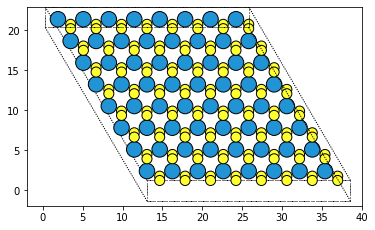

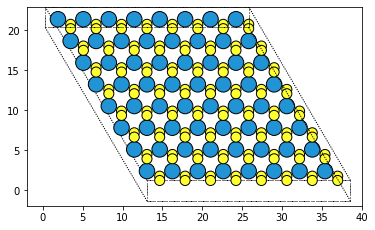

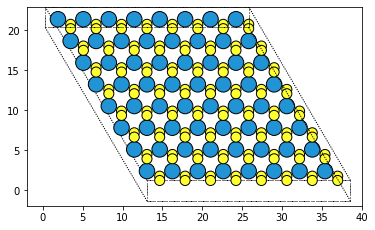

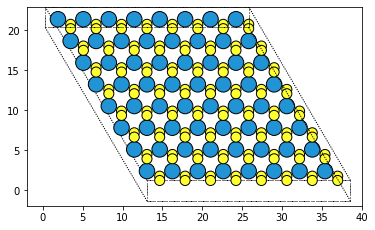

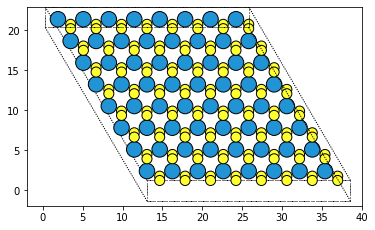

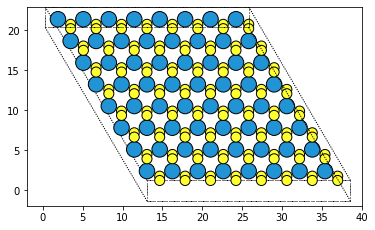

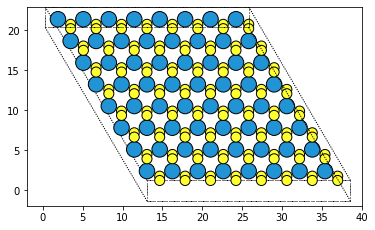

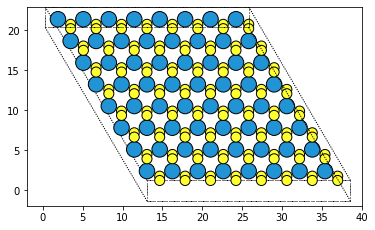

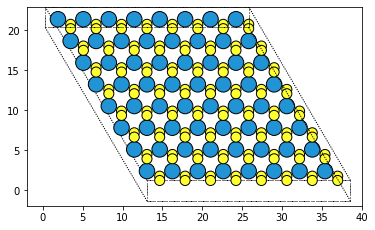

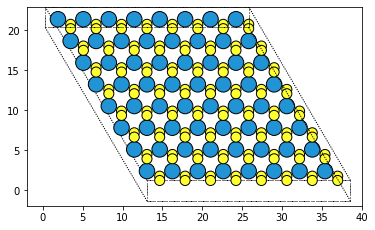

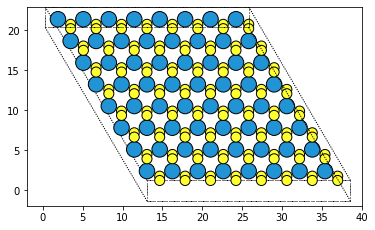

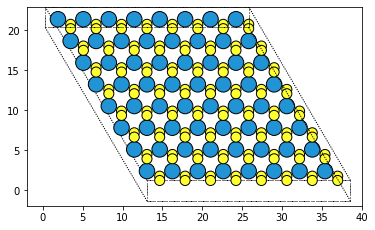

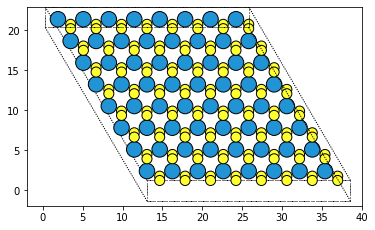

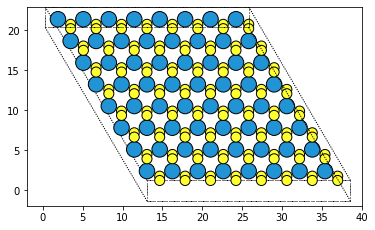

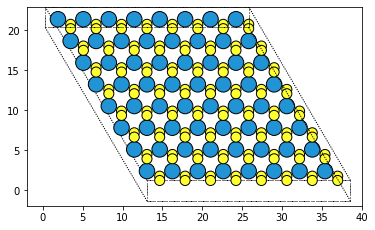

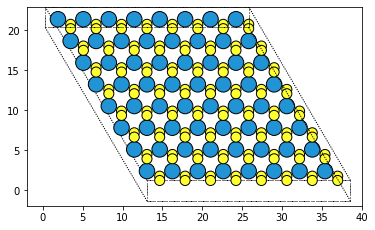

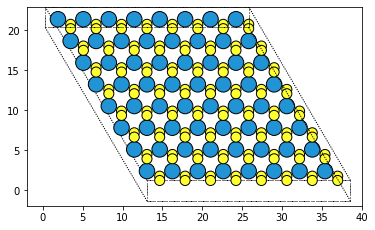

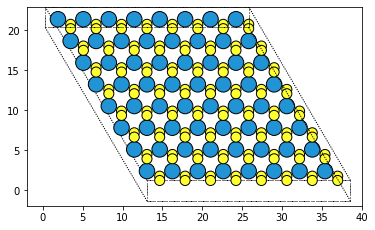

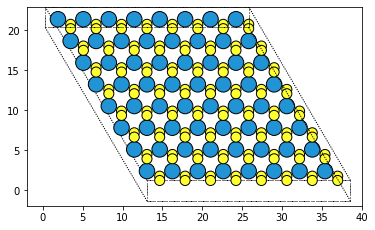

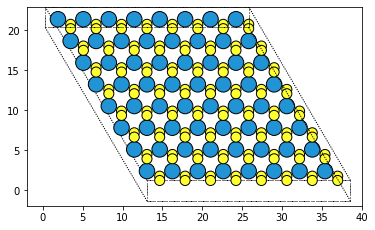

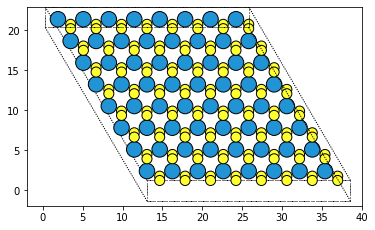

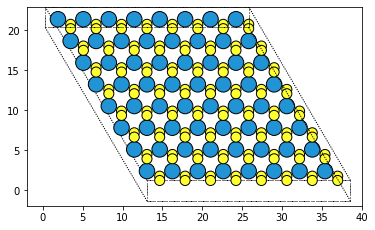

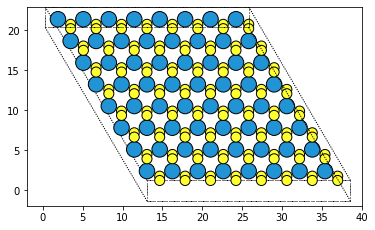

Error in callback <function flush_figures at 0x000002C6FADBAAF0> (for post_execute):


KeyboardInterrupt: 

In [14]:
for i, d in data3.iterrows():
    s0 = d.initial_structure
    d0 = d.defect_representation[0]
    ase_atoms = AseAtomsAdaptor.get_atoms(s0)
    fig, ax = plt.subplots()
    plot_atoms(ase_atoms, ax, radii=0.6, rotation=('10x, 0y, 0z'), show_unit_cell=True)
    xlim = 40
    ylim = 23
    ax.set_xlim(-2, xlim)
    ax.set_ylim(-2, ylim)
#     ax.set_axis_off()
#     ax.set_title(f'{d0} -- {d.defect_coords}')

In [16]:
arr = data3.iloc[0].initial_structure.copy()
arr2 = data2.iloc[2].initial_structure.copy()
type(arr2)

pymatgen.core.structure.Structure

Text(0.5, 1.0, '[11.16610508 15.65640177  3.719751  ] W -- [14, 5]')

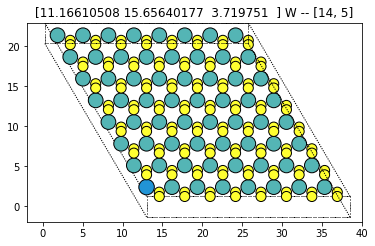

In [75]:
s0 = arr
d0 = d.defect_representation[0]
ase_atoms = AseAtomsAdaptor.get_atoms(s0)
fig, ax = plt.subplots()
plot_atoms(ase_atoms, ax, radii=0.6, rotation=('10x, 0y, 0z'), show_unit_cell=True)
xlim = 40
ylim = 23
ax.set_xlim(-2, xlim)
ax.set_ylim(-2, ylim)
#     ax.set_axis_off()
ax.set_title(f'{d0} -- {d.defect_coords}')

In [37]:
arr[0].specie = arr2[63].specie
structure.replace(site.index, site.species_string)

AttributeError: can't set attribute

In [42]:
arr = np.array(data3.iloc[0].initial_structure)
arr2 = data2.iloc[2].initial_structure
print(len(arr), len(arr2), sep='  ')
# print(arr == arr2)
# np.array(data3.iloc[0]["initial_structure"])
# for i in range(len(arr2)):
#     print(arr[i] == arr2[i])
#     print(arr[i], '============', arr2[i])


# data3['structure']  = data2.iloc[1].initial_structure
arr = np.array(data3.iloc[0].structure)
# print(len(arr), len(arr2), sep='  ')
data3

192  191


AttributeError: 'Series' object has no attribute 'structure'

In [109]:
# data3.iloc[0].initial_structure[64:]
import copy
# data2.iloc[3]["initial_structure"][64:] = copy.copy(data3.iloc[0].initial_structure[64:])

In [280]:
arr1 = data2.iloc[2].initial_structure
arr2 = data3.iloc[0].initial_structure
print(type(arr1))
# arr1.extend(arr2)
arr2[:]
print(type(arr2[191]))
print(arr1.lattice)

<class 'pymatgen.core.structure.Structure'>
<class 'pymatgen.core.sites.PeriodicSite'>
25.522526 0.000000 0.000000
-12.761263 22.103156 0.000000
0.000000 0.000000 14.879004


In [282]:
a = {}
for i in range(191):   
    print(arr1[i + 64], arr2[i + 64])
    arr1[i + 64] = copy.copy(arr2[i+64])
    print(arr1[i + 64], arr2[i + 64])
# arr1[:]

[28.95977884 20.35623016 32.06226926] S [1.59515772 0.92096489 2.15486663] S


ValueError: PeriodicSite added must have same lattice as Structure!

In [239]:
data4 = pd.DataFrame()
data4 = data3.copy()
# print(len(data3.iloc[0].initial_structure), len(data2.iloc[3].initial_structure), len(data4.iloc[0].initial_structure))
data4["structure"] = [copy.copy(arr1)]
print(type(data2.iloc[2].initial_structure), type(data4.iloc[0].structure))
# print(data4.iloc[0]["structure"])
data4

<class 'pymatgen.core.structure.Structure'> <class 'pymatgen.core.structure.Structure'>


,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,defect_representation,formation_energy,initial_structure,formation_energy_per_site,band_gap,defect_coords,structure
0,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001,"[5, 4]",[[1.27612629e-07 1.84192955e+00 3.71975100e+00...


In [224]:
s0 = data3.iloc[0].initial_structure
d0 = data3.iloc[0].defect_representation[0]
ase_atoms = AseAtomsAdaptor.get_atoms(s0)
fig, ax = plt.subplots()
plot_atoms(ase_atoms, ax, radii=0.6, rotation=('10x, 0y, 0z'), show_unit_cell=True)
xlim = 40
ylim = 23
ax.set_xlim(-2, xlim)
ax.set_ylim(-2, ylim)

AttributeError: 'numpy.int64' object has no attribute 'is_ordered'

(-2.0, 23.0)

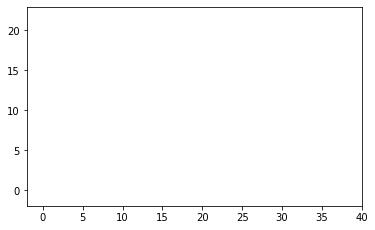

In [241]:
s0 = data4.iloc[0].structure
d0 = data4.iloc[0].defect_representation[0]
ase_atoms = AseAtomsAdaptor.get_atoms(s0)
fig, ax = plt.subplots()
plot_atoms(ase_atoms, ax, radii=0.6, rotation=('10x, 0y, 0z'), show_unit_cell=True)
xlim = 40
ylim = 23
ax.set_xlim(-2, xlim)
ax.set_ylim(-2, ylim)

In [92]:
#Вывод всех структур с дефектами по очереди
k = 1
x = 0
xo = 0
y = 7
yo = 7
while True:
    k += 1
    if k > 5000:
        break

    if (x + y > 21):
        xo += 1
        yo -= 1
        x = xo
        y = yo
    if (yo < 0):
        break
    for i, d in data3.iterrows():
#         if (d.defect_coords[0] == x and d.defect_coords[1] == y):
#             ####
#             g = 0
        for j in d.initial_structure:
            print(j)
#                 if g == 0: 
#                     coords_2 = j
#                     g += 1
#                 print()
#                 print()
            ####
#             print(d.defect_representation[0], d.defect_coords)
            x += 2
print()
print(coords_2)

[1.27612629e-07 1.84192955e+00 3.71975100e+00] Mo
[-1.59515772  4.604824    3.719751  ] Mo
[-3.19031561  7.36771851  3.719751  ] Mo
[-4.78547342 10.13061288  3.719751  ] Mo
[-6.38063127 12.89350732  3.719751  ] Mo
[-7.97578912 15.65640177  3.719751  ] Mo
[-9.57094697 18.41929621  3.719751  ] Mo
[-11.16610482  21.18219065   3.719751  ] Mo
[3.19031583 1.84192955 3.719751  ] Mo
[1.59515798 4.604824   3.719751  ] Mo
[8.50750874e-08 7.36771851e+00 3.71975100e+00] Mo
[-1.59515772 10.13061288  3.719751  ] Mo
[-4.78547342 15.65640177  3.719751  ] Mo
[-6.38063127 18.41929621  3.719751  ] Mo
[-7.97578912 21.18219065  3.719751  ] Mo
[6.38063153 1.84192955 3.719751  ] Mo
[4.78547368 4.604824   3.719751  ] Mo
[3.19031579 7.36771851 3.719751  ] Mo
[ 1.59515798 10.13061288  3.719751  ] Mo
[1.27612633e-07 1.28935073e+01 3.71975100e+00] Mo
[-1.59515772 15.65640177  3.719751  ] Mo
[-3.19031557 18.41929621  3.719751  ] Mo
[-4.78547342 21.18219065  3.719751  ] Mo
[9.57094723 1.84192955 3.719751  ] Mo
[7.9

[6.38063127 9.20964821 5.28463537] S
[ 4.78547342 11.97254266  5.28463537] S
[ 3.19031561 14.73543703  5.28463537] S
[ 1.59515772 17.49833154  5.28463537] S
[-1.27612621e-07  2.02612260e+01  5.28463537e+00] S
[14.35642052  0.92096489  5.28463537] S
[12.76126267  3.68385933  5.28463537] S
[11.16610482  6.44675377  5.28463537] S
[9.57094697 9.20964821 5.28463537] S
[ 7.97578912 11.97254266  5.28463537] S
[ 6.38063131 14.73543703  5.28463537] S
[ 4.78547342 17.49833154  5.28463537] S
[ 3.19031557 20.26122598  5.28463537] S
[17.54673622  0.92096489  5.28463537] S
[15.95157837  3.68385933  5.28463537] S
[14.35642052  6.44675377  5.28463537] S
[12.76126267  9.20964821  5.28463537] S
[11.16610482 11.97254266  5.28463537] S
[ 9.57094701 14.73543703  5.28463537] S
[ 7.97578912 17.49833154  5.28463537] S
[ 6.38063127 20.26122598  5.28463537] S
[20.73705192  0.92096489  5.28463537] S
[19.14189407  3.68385933  5.28463537] S
[17.54673622  6.44675377  5.28463537] S
[15.95157837  9.20964821  5.284635

[20.73705192  0.92096489  5.28463537] S
[19.14189407  3.68385933  5.28463537] S
[17.54673622  6.44675377  5.28463537] S
[15.95157837  9.20964821  5.28463537] S
[14.35642052 11.97254266  5.28463537] S
[12.76126271 14.73543703  5.28463537] S
[11.16610482 17.49833154  5.28463537] S
[ 9.57094697 20.26122598  5.28463537] S
[23.92736762  0.92096489  5.28463537] S
[22.33220977  3.68385933  5.28463537] S
[20.73705192  6.44675377  5.28463537] S
[19.14189407  9.20964821  5.28463537] S
[17.54673622 11.97254266  5.28463537] S
[15.95157841 14.73543703  5.28463537] S
[14.35642052 17.49833154  5.28463537] S
[12.76126267 20.26122598  5.28463537] S
[1.27612629e-07 1.84192955e+00 3.71975100e+00] Mo
[-1.59515772  4.604824    3.719751  ] Mo
[-3.19031561  7.36771851  3.719751  ] Mo
[-4.78547342 10.13061288  3.719751  ] Mo
[-6.38063127 12.89350732  3.719751  ] Mo
[-7.97578912 15.65640177  3.719751  ] Mo
[-9.57094697 18.41929621  3.719751  ] Mo
[-11.16610482  21.18219065   3.719751  ] Mo
[3.19031583 1.841929

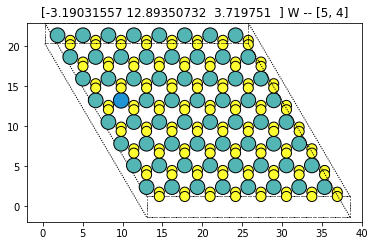

In [34]:
for i, d in data3.iterrows():
    s0 = d.initial_structure
    d0 = d.defect_representation[0]
    ase_atoms = AseAtomsAdaptor.get_atoms(s0)
    fig, ax = plt.subplots()
    plot_atoms(ase_atoms, ax, radii=0.6, rotation=('10x, 0y, 0z'), show_unit_cell=True)
    xlim = 40
    ylim = 23
    ax.set_xlim(-2, xlim)
    ax.set_ylim(-2, ylim)
#     ax.set_axis_off()
    ax.set_title(f'{d0} -- {d.defect_coords}')

In [62]:
# data3.iloc[0, 6][0]
data3.defect_representation[0][0].coords
# coords_1 = np.array([1.27612629e-07 1.84192955e+00 3.71975100e+00])

# data3.initial_structure = coords_2
# print(data3.initial_structure[0][0])
data3.iloc[0]["initial_structure"] = coords_2

,descriptor_id,energy,energy_per_atom,fermi_level,homo,lumo,defect_representation,formation_energy,initial_structure,formation_energy_per_site,band_gap,defect_coords
0,6141cf15c819ca30b196b471,-1400.023811,-7.291791,-0.194139,-0.7016,1.0985,[[-3.19031557 12.89350732 3.719751 ] W],0.166689,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,0.166689,1.8001,"[5, 4]"


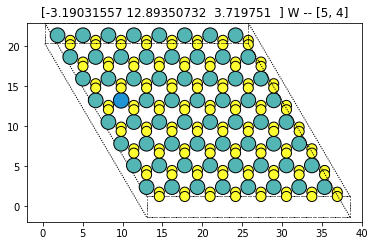

In [61]:
k = 1
for i, d in data3.iterrows():
    k += 1
    if k > 10:
        break
    s0 = d.initial_structure
    d0 = d.defect_representation[0]
    ase_atoms = AseAtomsAdaptor.get_atoms(s0)
    fig, ax = plt.subplots()
    plot_atoms(ase_atoms, ax, radii=0.6, rotation=('10x, 0y, 0z'), show_unit_cell=True)
    xlim = 40
    ylim = 23
    ax.set_xlim(-2, xlim)
    ax.set_ylim(-2, ylim)
#     ax.set_axis_off()
    ax.set_title(f'{d0} -- {d.defect_coords}')

In [125]:
def Rand():
    x = np.random.randint(0, 6)
    if x == 0:
        y = np.array([-1, -1])
    elif x == 1:
        y = np.array([-2, 0])
    elif x == 2:
        y = np.array([-1, 1])
    elif x == 3:
        y = np.array([1, 1])
    elif x == 4:
        y = np.array([2, 0])
    elif x == 5:
        y = np.array([1, -1])
    return y

In [63]:
#Вывод всех структур с дефектами по очереди
k = 1
x = 0
xo = 0
y = 7
yo = 7
while True:
    k += 1
    if k > 5000:
        break

    if (x + y > 21):
        xo += 1
        yo -= 1
        x = xo
        y = yo
    if (yo < 0):
        break
    for i, d in data2.iterrows():
        if (d.defect_coords[0] == x and d.defect_coords[1] == y):
#             print(d.defect_representation[0], d.defect_coords)
            x += 2

In [208]:
#Создание картинок, на основе которых будет создаваться GIF


# arr = np.array([0, 0])
# for i in range(10):
#     y = Rand()
#     arr = arr + y
#     print(y, end= '___')
#     print(arr)


k = 1
coords = np.array([0, 7])
list_gif = []
while True:
    if k == 1:
        k += 1
        continue
    elif k < 12:
        while True:
            newpos = Rand()
            coords = coords + newpos
            if (coords[0] + coords[1] < 22) and (coords[0] + coords[1] > 6) and (0 < coords[0] < 22) and (0 < coords[1] < 8):
                break
            else:
                coords = coords - newpos
                continue
        k += 1
    else:
        break
        
    for s, d in data2.iterrows():
        if (d.defect_coords[0] == coords[0] and d.defect_coords[1] == coords[1]):
            print(d.defect_representation[0], d.defect_coords)
            list_gif.append(d.initial_structure)
            break

[-7.97578912 21.18219065  3.719751  ] W [2, 7]
[-6.38063127 18.41929621  3.719751  ] W [3, 6]
[-7.97578912 21.18219065  3.719751  ] W [2, 7]
[-9.57094697 18.41929621  3.719751  ] W [1, 6]
[-7.97578912 21.18219065  3.719751  ] W [2, 7]
[-9.57094697 18.41929621  3.719751  ] W [1, 6]
[-7.97578912 21.18219065  3.719751  ] W [2, 7]
[-6.38063127 18.41929621  3.719751  ] W [3, 6]
[-7.97578912 15.65640177  3.719751  ] W [2, 5]
[-6.38063127 12.89350732  3.719751  ] W [3, 4]


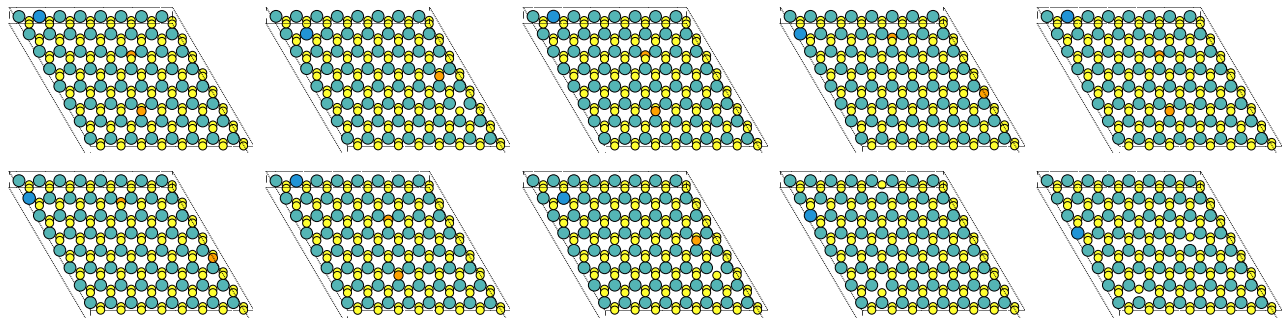

In [209]:
fig, axes = plt.subplots(2, 5, figsize=(18, 5))
# plt.rc('axes', titlesize=18)
# ax.axis('off')
for i in range(10):
    ax = axes[i//5][i%5]
    ase_atoms = AseAtomsAdaptor.get_atoms(list_gif[i])
    plot_atoms(ase_atoms, ax, radii=0.6, rotation=('10x, 0y, 0z'), show_unit_cell=True)
    axes[i//5][i%5].set_axis_off()


plt.tight_layout()

Часть кода, который был изначально в файле images-fig2

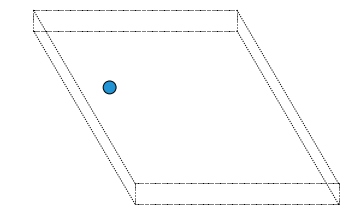

In [56]:
ase_atoms = AseAtomsAdaptor.get_atoms(d0)
fig, ax = plt.subplots()
plot_atoms(ase_atoms, ax, radii=0.5, rotation=('10x, 0y, 0z'), show_unit_cell=True)
x_offset=-10
y_offset=-12
ax.set_xlim(-2+x_offset, xlim+x_offset)
ax.set_ylim(-2+y_offset, ylim+y_offset)
ax.set_axis_off()
fig.savefig("substution_sparse.pdf", bbox_inches="tight")

In [72]:
from pymatgen.core.periodic_table import DummySpecies
for i, d in data.iterrows():
    if (len(d.defect_representation) == 10 and 
            isinstance(d.defect_representation[10].specie, DummySpecies)):
        s0 = d.initial_structure
        d0 = d.defect_representation
        print(i)
        break

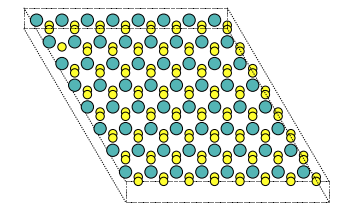

In [73]:
ase_atoms = AseAtomsAdaptor.get_atoms(s0)
fig, ax = plt.subplots()
plot_atoms(ase_atoms, ax, radii=0.5, rotation=('10x, 0y, 0z'), show_unit_cell=True)
xlim = 40
ylim = 23
ax.set_xlim(-2, xlim)
ax.set_ylim(-2, ylim)
ax.set_axis_off()
fig.savefig("vacancy_full.pdf", bbox_inches="tight")

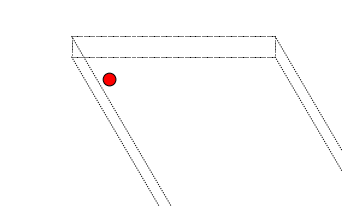

In [67]:
ase_atoms = AseAtomsAdaptor.get_atoms(d0)
fig, ax = plt.subplots()
plot_atoms(ase_atoms, ax, radii=4., rotation=('10x, 0y, 0z'), show_unit_cell=True)
x_offset=-10
y_offset=-13
ax.set_xlim(-2+x_offset, xlim+x_offset)
ax.set_ylim(-2+y_offset, ylim+y_offset)
ax.set_axis_off()
fig.savefig("vacancy_sparse.pdf", bbox_inches="tight")